In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
data=pd.read_csv("C:/Users/tapas/AppData/Local/Temp/bae1478a-5fcf-44d4-9c3f-2650646d245d_16267312 (1).zip.45d/Hate Speech Detection/twitter.csv")

In [7]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [8]:
data["labels"]=data["class"].map({0: "hate_speech", 1:"Offiensive_language" , 2:"No Hate and Offensive"})
data.tail()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offiensive_language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offiensive_language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offiensive_language
24782,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,No Hate and Offensive


In [9]:
data["class"].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [10]:
data["labels"].value_counts()

Offiensive_language      19190
No Hate and Offensive     4163
hate_speech               1430
Name: labels, dtype: int64

In [11]:
data=data[["tweet","labels"]]
data.tail()

,tweet,labels
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offiensive_language
24779,"you've gone and broke the wrong heart baby, an...",No Hate and Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offiensive_language
24781,youu got wild bitches tellin you lies,Offiensive_language
24782,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...,No Hate and Offensive


In [12]:
import nltk

In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tapas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:

def dataclean(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"]=data["tweet"].apply(dataclean)
data.head()

C:\Users\tapas\AppData\Local\Temp\ipykernel_17060\2136896521.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(dataclean)


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate and Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offiensive_language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offiensive_language
3,rt cganderson vivabas look like tranni,Offiensive_language
4,rt shenikarobert shit hear might true might f...,Offiensive_language


In [15]:
data['labels'].value_counts()

Offiensive_language      19190
No Hate and Offensive     4163
hate_speech               1430
Name: labels, dtype: int64

In [16]:
len(data)

24783

In [17]:
cor=" "

for i in range(0,962):
    cor=cor+data["tweet"][i]

In [18]:
cor[301:4000]

'x shit blow meclaim faith somebodi still fuck hoe brighterday sit hate anoth bitch  got much shit go caus im tire big bitch come us skinni  amp might get ya bitch back amp that  rhythmixx hobbi includ fight mariambitch keek bitch curv everyon  lol walk convers like smh murda gang bitch gang land  hoe smoke loser   yea  go ig bad bitch thing like  bitch get  bitch nigga miss  bitch plz whatev  bitch love  bitch get cut everyday b  black bottl amp bad bitch  broke bitch cant tell noth  cancel bitch like nino  cant see hoe wont chang  fuck bitch dont even suck dick   kermit video bout fuck ig got ya bitch tip toe hardwood floor    pussi lip like heaven door   hoe hit  met pussi ocean dr  gave pussi pill   need trippi bitch fuck hennessi  spend money want bitch busi  txt old bitch new bitch pussi wetter  id say im back old old bitch would get excit   aint bout murder game pussi nigga shut  your toe aint done pussi stink  im done bitter bitch wrap  angri bird there app  ya bitch  aint noth

In [19]:
data['tweet'][5000]

'tielermlg psvch halfass come rescu retard lick dirti skidmark internet guy fucktard'

In [20]:
token=nltk.tokenize.RegexpTokenizer('\w+')

tok=token.tokenize(cor)

len(tok)

7574

In [21]:
words=[]

for word in tok:
    words.append(word.lower())

In [22]:
stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [23]:
len(words_new)

7524

In [24]:
# Lemmatization

In [25]:
import nltk

In [26]:
from nltk.corpus import brown

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tapas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tapas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
nltk.data.path.append("")

In [30]:
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [31]:
len(lem_words)

7524

In [32]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
        
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 30
Number of words not Lemmatized= 1802


In [33]:
freq = nltk.FreqDist(lem_words)

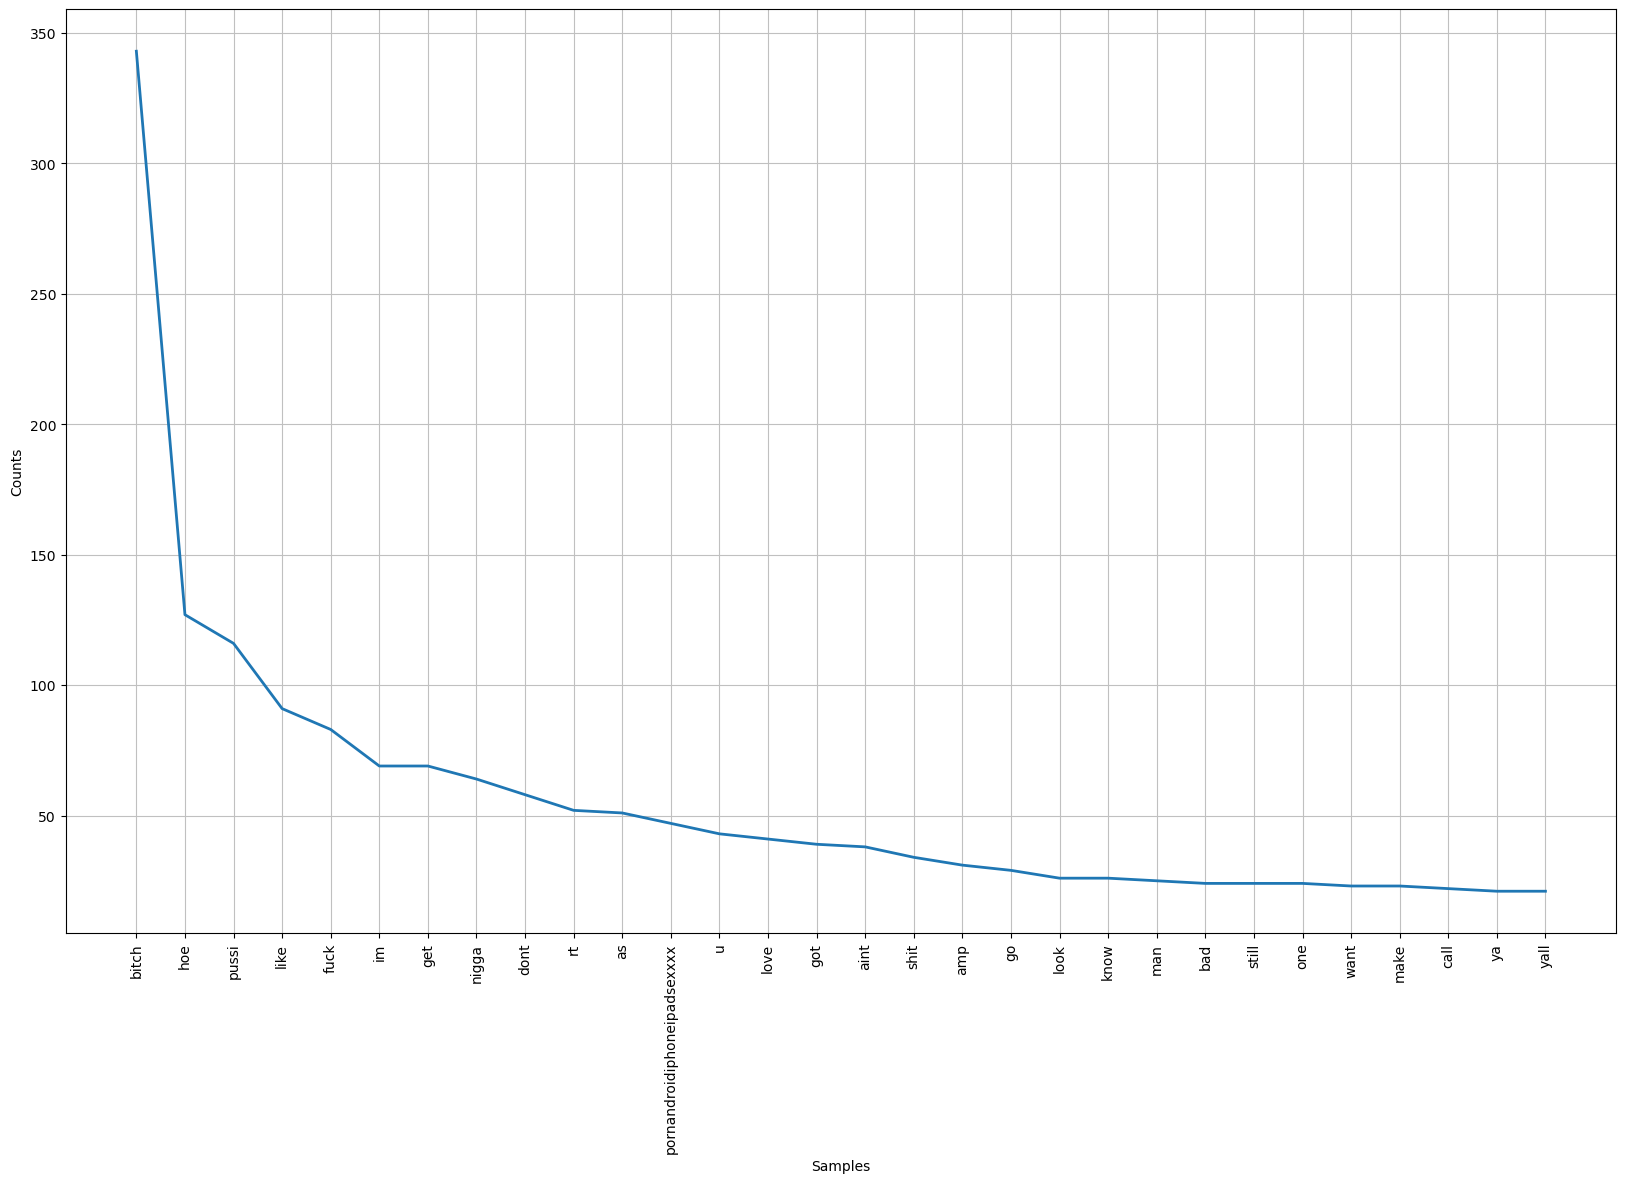

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
plt.subplots(figsize=(20,12))
freq.plot(30)

In [35]:
len(freq)

3168

In [36]:
common=freq.most_common(50)

In [37]:
common

[('bitch', 343),
 ('hoe', 127),
 ('pussi', 116),
 ('like', 91),
 ('fuck', 83),
 ('im', 69),
 ('get', 69),
 ('nigga', 64),
 ('dont', 58),
 ('rt', 52),
 ('as', 51),
 ('pornandroidiphoneipadsexxxx', 47),
 ('u', 43),
 ('love', 41),
 ('got', 39),
 ('aint', 38),
 ('shit', 34),
 ('amp', 31),
 ('go', 29),
 ('look', 26),
 ('know', 26),
 ('man', 25),
 ('bad', 24),
 ('still', 24),
 ('one', 24),
 ('want', 23),
 ('make', 23),
 ('call', 22),
 ('ya', 21),
 ('yall', 21),
 ('yo', 21),
 ('trash', 20),
 ('cant', 20),
 ('dick', 20),
 ('girl', 20),
 ('white', 20),
 ('hate', 19),
 ('back', 19),
 ('bird', 19),
 ('say', 18),
 ('said', 18),
 ('damn', 18),
 ('lol', 17),
 ('even', 17),
 ('never', 17),
 ('see', 16),
 ('would', 16),
 ('talk', 16),
 ('scalli', 16),
 ('eat', 16)]

In [38]:
data['labels'].value_counts()

Offiensive_language      19190
No Hate and Offensive     4163
hate_speech               1430
Name: labels, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

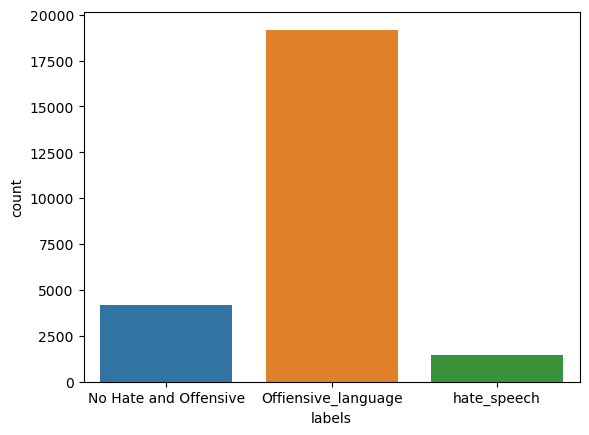

In [39]:
sns.countplot(x=data['labels'])

In [40]:
# worlwcould

In [41]:
res=' '.join([i for i in lem_words if not i.isdigit()])

In [42]:
import wordcloud

In [43]:
from wordcloud import WordCloud

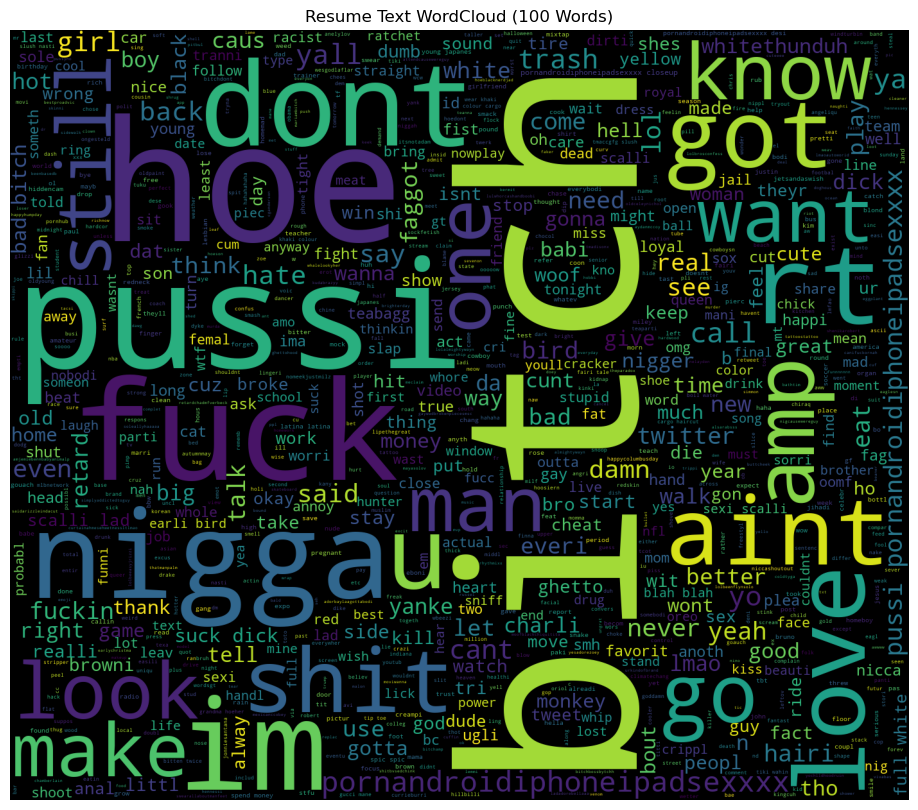

In [44]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=1000,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

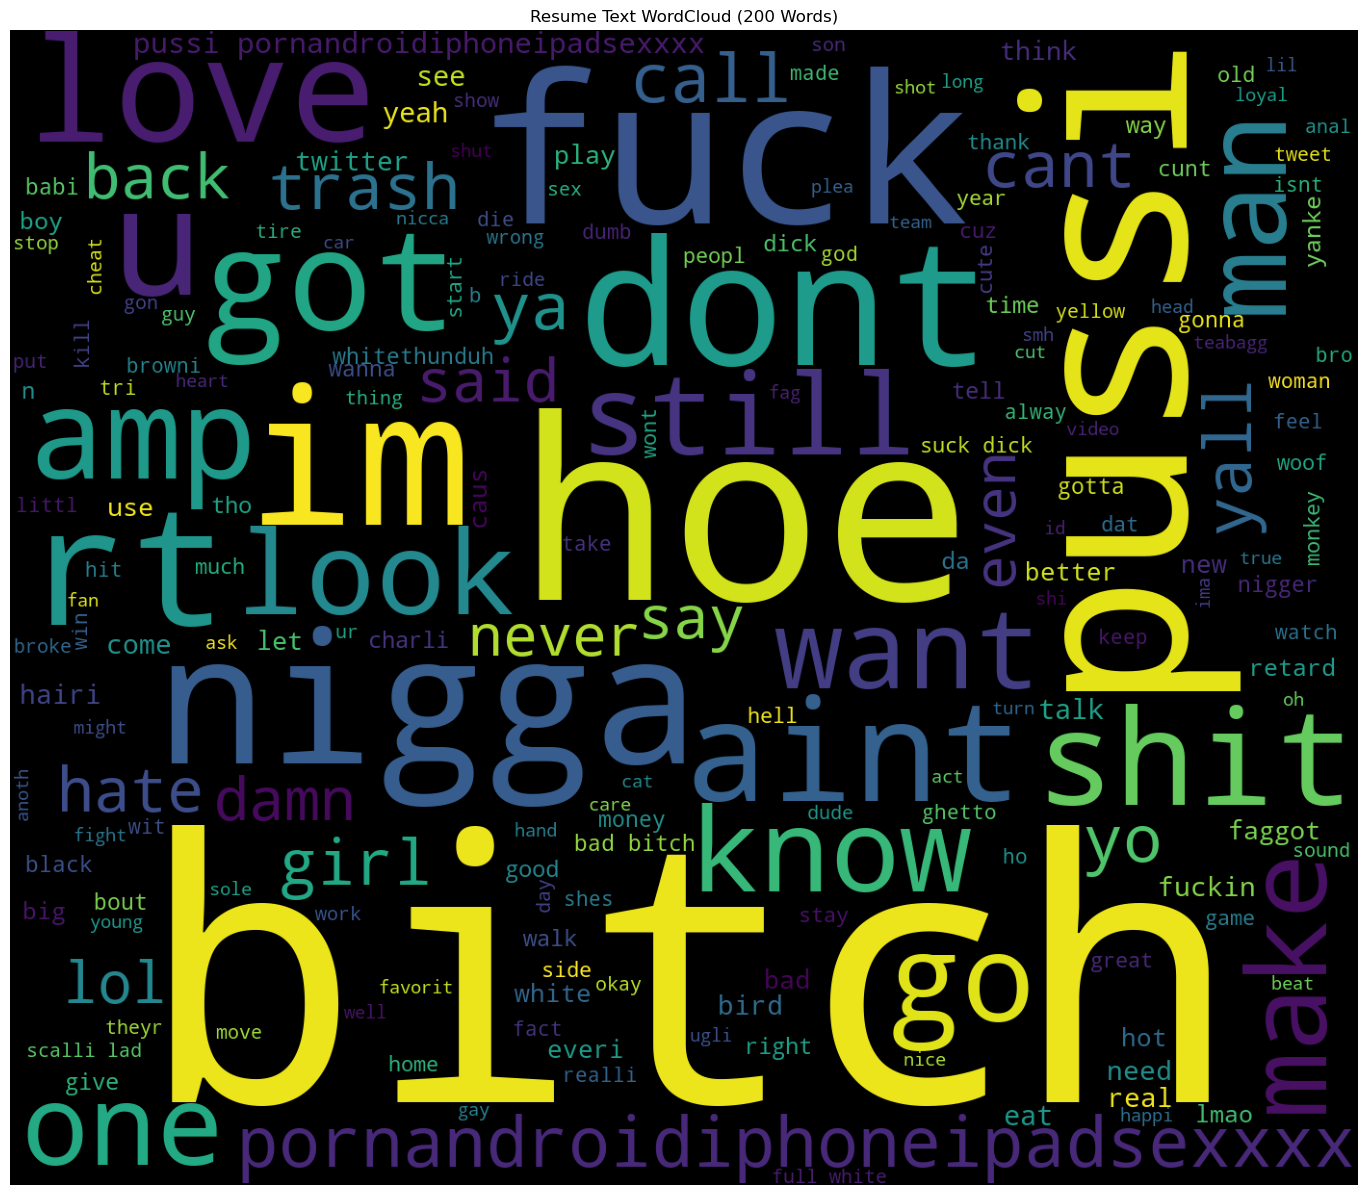

In [45]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

In [46]:
# Build The Model 

In [47]:
x=np.array(data['tweet'])
y=np.array(data['labels'])

cv=CountVectorizer()
X=cv.fit_transform(x)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [48]:
Clf=DecisionTreeClassifier()
Clf.fit(X_train,y_train)
Clf.score(X_test,y_test)

0.87614622814525

In [49]:
user=input("Enter a Text: ")
data=cv.transform([user]).toarray()
output=Clf.predict(data)
print(output)

Enter a Text: my name is Tapas
['No Hate and Offensive']
